In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from my_info import *

/Users/mattg/Personal Projects/2024_forecast/my_info.py:15: DtypeWarning: Columns (15,16,22,24,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  pres_2020_poll_df = pd.read_csv(data_path + 'pres_polls_2020.csv')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


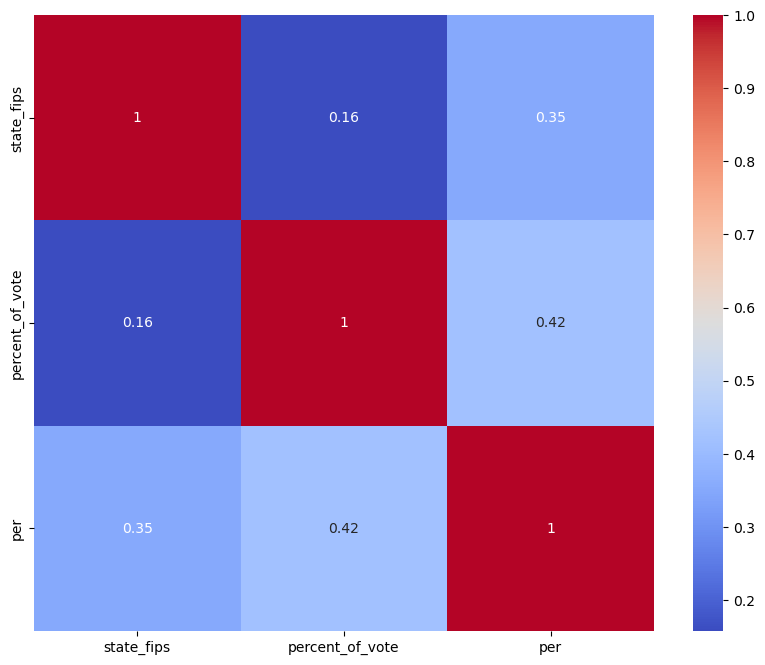

In [2]:
merged_df = pd.merge(pres_results, race_state_df, left_on="state_fips", right_on="state_fips")
merged_df["percent_of_vote"] = merged_df["candidatevotes"] * 100 / merged_df["totalvotes"]

## Filter the df
filtered_df = merged_df[merged_df["party_detailed"] == "REPUBLICAN"]
filtered_df = filtered_df[filtered_df["race_name"] == "White"]
filtered_df = filtered_df[filtered_df["year"] >= 2000]
filtered_df = filtered_df[["state_fips", "percent_of_vote", "race_name", "per"]]

corr_matrix = filtered_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

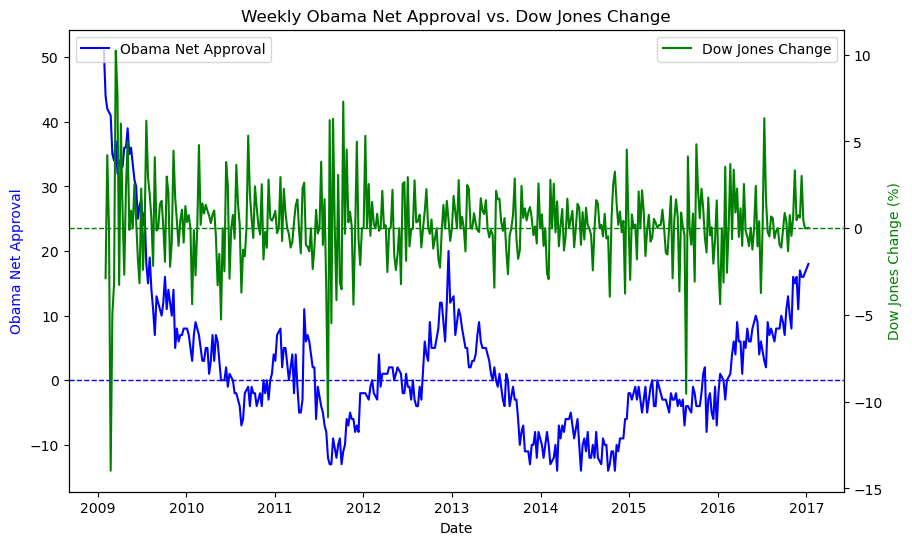

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframes are already loaded

# Convert 'start_date' column in obama_approval_df to datetime format
obama_approval_df['start_date'] = pd.to_datetime(obama_approval_df['start_date'], dayfirst=True)

# Merge the two dataframes on the date column
merged_df = pd.merge(obama_approval_df, df_dow_jones, left_on='start_date', right_index=True)

# Resample data to weekly frequency
weekly_df = merged_df.resample('W-Mon', on='start_date').mean()

# Set up the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the 'net' column from obama_approval_df on the first y-axis (ax1)
sns.lineplot(x='start_date', y='net', data=weekly_df, ax=ax1, label='Obama Net Approval', color='blue')

# Create a second y-axis (ax2) for the Dow Jones data
ax2 = ax1.twinx()
ax2.plot(weekly_df.index, weekly_df['Close'].pct_change() * 100, label='Dow Jones Change', color='green')

# Draw lines at 0 for both y-axes
ax1.axhline(y=0, color='blue', linestyle='--', linewidth=1)
ax2.axhline(y=0, color='green', linestyle='--', linewidth=1)

# Customize the plot
ax1.set_ylabel('Obama Net Approval', color='blue')
ax2.set_ylabel('Dow Jones Change (%)', color='green')
ax1.set_xlabel('Date')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Weekly Obama Net Approval vs. Dow Jones Change')
plt.show()
